Données brutes (NumPy)
[[16.   7.1  7.9]
 [14.8  7.3  8.3]
 [15.6  7.2  8. ]]

Moyennes des paramètres
[15.46666667  7.2         8.06666667]

Fichier 'moyennes_eau.txt' sauvegardé.

Données initiales (pandas)
  Site  Temperature   pH  Oxygene
0    A         15.2  7.4      8.1
1    B         16.0  7.1      7.9
2    C         14.8  NaN      8.3
3    D         15.6  7.2      NaN
4    E          NaN  7.3      8.0

Valeurs manquantes par colonne
Site           0
Temperature    1
pH             1
Oxygene        1
dtype: int64

Données après remplissage des NaN
  Site  Temperature    pH  Oxygene
0    A         15.2  7.40    8.100
1    B         16.0  7.10    7.900
2    C         14.8  7.25    8.300
3    D         15.6  7.20    8.075
4    E         15.4  7.30    8.000

Données finales avec colonnes dérivées
  Site  Temperature    pH  Oxygene  Qualite Alerte
0    A         15.2  7.40    8.100    Bonne     OK
1    B         16.0  7.10    7.900  Moyenne     OK
2    C         14.8  7.25    8.300  

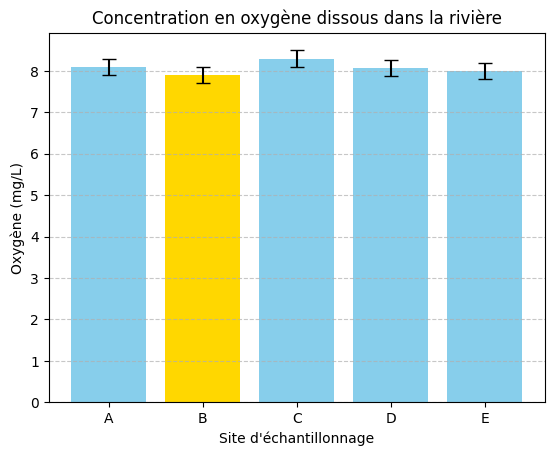

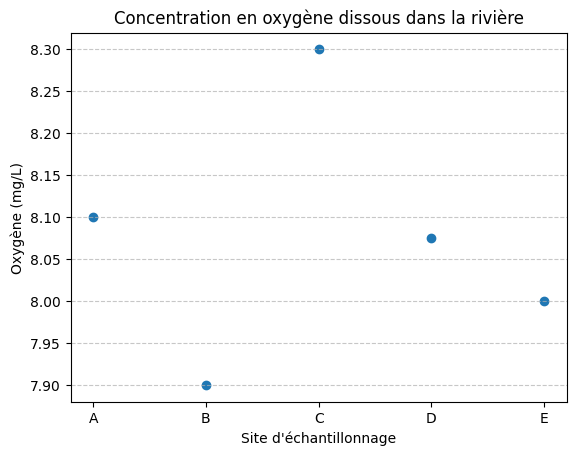

In [ ]:
import numpy as np
import pandas as pd

# PARTIE 1 — Lecture et écriture avec NumPy

# Lecture du fichier texte "eau.txt" (valeurs numériques sans en-têtes, délimitées par un espace)
donnees_np = np.genfromtxt("eau.txt", delimiter=" ", skip_header=1)

print("Données brutes (NumPy)")
print(donnees_np)

# Calcul de la moyenne pour chaque colonne
moyennes = np.nanmean(donnees_np, axis=0)

print()
print("Moyennes des paramètres")
print(moyennes)

# Sauvegarde des moyennes dans un fichier texte
np.savetxt("moyennes_eau.txt", moyennes, fmt="%.2f")
print()
print("Fichier 'moyennes_eau.txt' sauvegardé.")


# PARTIE 1 — Lecture et nettoyage avec pandas

# Lecture du fichier CSV "eau_riviere.csv"
df = pd.read_csv("eau_riviere.csv")

print()
print("Données initiales (pandas)")
print(df)

# Détection des valeurs manquantes
print()
print("Valeurs manquantes par colonne")
print(df.isna().sum())

# Remplacement des valeurs manquantes par la moyenne de la colonne
df["Temperature"] = df["Temperature"].fillna(df["Temperature"].mean())
df["pH"] = df["pH"].fillna(df["pH"].mean())
df["Oxygene"] = df["Oxygene"].fillna(df["Oxygene"].mean())

# OU pour tout le DataFrame d’un coup
# df = df.fillna(df.mean(numeric_only=True))

print()
print("Données après remplissage des NaN")
print(df)


# Ajout de la colonne 'Qualite' selon la concentration en oxygène
# Règles :
# - Oxygène >= 8.0 → "Bonne"
# - 7.5 <= Oxygène < 8.0 → "Moyenne"
# - Oxygène < 7.5 → "Faible"

df["Qualite"] = np.where(
    df["Oxygene"] >= 8.0, "Bonne",
    np.where(
        (df["Oxygene"] >= 7.5) & (df["Oxygene"] < 8.0), "Moyenne",
        "Faible"
    )
)


# Ajout de la colonne 'Alerte' selon le pH
# Si pH < 7.0 → "Attention", sinon "OK"

df["Alerte"] = np.where(df["pH"] < 7.0, "Attention", "OK")

print()
print("Données finales avec colonnes dérivées")
print(df)


# Sauvegarde finale du fichier nettoyé
df.to_csv("eau_riviere_nettoyee.csv", index=False)
print()
print("Fichier 'eau_riviere_nettoyee.csv' sauvegardé avec succès.")

# PARTIE 2 — Visualisation graphique (Optionnel)

import matplotlib.pyplot as plt

# Graphique 1
erreur = 0.2
couleurs = df["Qualite"].map({"Bonne": "skyblue", "Moyenne": "gold", "Faible": "salmon"})

plt.bar(df["Site"], df["Oxygene"], yerr=erreur, capsize=5, color=couleurs)
plt.title("Concentration en oxygène dissous dans la rivière")
plt.xlabel("Site d'échantillonnage")
plt.ylabel("Oxygène (mg/L)")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

# Graphique 2
plt.scatter(df["Site"], df["Oxygene"])
plt.title("Concentration en oxygène dissous dans la rivière")
plt.xlabel("Site d'échantillonnage")
plt.ylabel("Oxygène (mg/L)")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


